##Data Roles by Industry: Salary & Skills Storytelling

ข้อมูลนี้พาเราไปสำรวจว่า “สาย Data” มีมูลค่าอย่างไรในอุตสาหกรรมต่าง ๆ ตั้งแต่ปี 2020–2024
แทนที่จะดูเพียงตัวเลขเงินเดือน เราลองเปิดมุมมองว่า อุตสาหกรรมไหนจ่ายสูงสุด, ต้องการทักษะแบบไหน และโอกาสเติบโตด้านรายได้จริง ๆ อยู่ตรงไหน

In [ ]:
# =========================================
# Colab: Salary + Skills Analysis (10 Industry Groups)
# =========================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# -------------------------------
# 1) Upload dataset
# -------------------------------
print(" โปรดอัปโหลดไฟล์ Data ETL Final.xlsx หรือ CSV")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

if filename.lower().endswith(".csv"):
    df = pd.read_csv(filename)
elif filename.lower().endswith((".xls", ".xlsx")):
    df = pd.read_excel(filename, sheet_name=0)
else:
    raise ValueError(" รองรับเฉพาะไฟล์ CSV หรือ Excel เท่านั้น")

print(" Data Loaded:", df.shape)
display(df.head())

# -------------------------------
# 2) Mapping Industry
# -------------------------------
industry_map_10 = {
    # Technology
    "Computer Software": "Technology",
    "Information Technology": "Technology",
    "Internet Services": "Technology",
    "Computer Hardware": "Technology",
    "Telecommunications": "Technology",
    "IT Services": "Technology",
    "Enterprise Software & Network Solutions": "Technology",
    "Internet": "Technology",
    "Telecommunications Services": "Technology",
    "Telecommunications Manufacturing": "Technology",
    "Consulting": "Business Services",
    # Finance
    "Banking": "Finance",
    "Insurance": "Finance",
    "Investment Management": "Finance",
    "FinTech": "Finance",
    "Finance": "Finance",
    "Accounting": "Finance",
    "Accounting & Legal": "Finance",
    "Insurance Carriers": "Finance",
    "Lending": "Finance",
    "Insurance Agencies & Brokerages": "Finance",
    "Financial Analytics & Research": "Finance",
    "Banks & Credit Unions": "Finance",
    "Brokerage Services": "Finance",
    "Investment Banking & Asset Management": "Finance",
    "Financial Transaction Processing": "Finance",
    "Real Estate": "Finance",
    "Metals Brokers": "Finance",
    "Stock Exchanges": "Finance",

    # Healthcare & Biotech
    "Healthcare": "Healthcare & Biotech",
    "Health Care": "Healthcare & Biotech",
    "Pharmaceuticals": "Healthcare & Biotech",
    "Biotechnology": "Healthcare & Biotech",
    "Biotech & Pharmaceuticals": "Healthcare & Biotech",
    "Health Care Services & Hospitals": "Healthcare & Biotech",
    "Research & Development": "Healthcare & Biotech",
    "Health Care Products Manufacturing": "Healthcare & Biotech",

    # Retail & Consumer
    "Retail": "Retail & Consumer",
    "E-commerce": "Retail & Consumer",
    "Consumer Goods": "Retail & Consumer",
    "Consumer Services": "Retail & Consumer",
    "Wholesale": "Retail & Consumer",
    "Department, Clothing, & Shoe Stores": "Retail & Consumer",
    "Beauty & Personal Accessories Stores": "Retail & Consumer",
    "Consumer Product Rental": "Retail & Consumer",
    "Sporting Goods Stores": "Retail & Consumer",
    "Auctions & Galleries": "Retail & Consumer",
    "Health, Beauty, & Fitness": "Retail & Consumer",
    "Other Retail Stores": "Retail & Consumer",

    # Entertainment & Media
    "Entertainment": "Entertainment & Media",
    "Media": "Entertainment & Media",
    "Gaming": "Entertainment & Media",
    "Arts, Entertainment & Recreation": "Entertainment & Media",
    "Advertising & Marketing": "Entertainment & Media",
    "TV Broadcast & Cable Networks": "Entertainment & Media",
    "Video Games": "Entertainment & Media",
    "Gambling": "Entertainment & Media",
    "Motion Picture Production & Distribution": "Entertainment & Media",

    #  Manufacturing
    "Manufacturing": "Manufacturing",
    "Mining & Metals": "Manufacturing",
    "Agriculture & Forestry": "Manufacturing",
    "Transportation & Logistics": "Manufacturing",
    "Oil, Gas, Energy & Utilities": "Manufacturing",
    "Energy": "Manufacturing",
    "Industrial Manufacturing": "Manufacturing",
    "Gas Stations": "Manufacturing",
    "Trucking": "Manufacturing",
    "Mining": "Manufacturing",
    "Consumer Products Manufacturing": "Manufacturing",
    "Food & Beverage Manufacturing": "Manufacturing",
    "Transportation Equipment Manufacturing": "Manufacturing",
    "Farm Support Services": "Manufacturing",

    # Public & Education
    "Education": "Public & Education",
    "Government": "Public & Education",
    "Non-Profit": "Public & Education",
    "Colleges & Universities": "Public & Education",
    "K-12 Education": "Public & Education",
    "Social Assistance": "Public & Education",
    "Education Training Services": "Public & Education",
    "Federal Agencies": "Public & Education",
    "Religious Organizations": "Public & Education",

    # Business Services
    "Business Services": "Business Services",

    "Staffing & Outsourcing": "Business Services",
    "Security Services": "Business Services",
    "Transportation Management": "Business Services",
    "Logistics & Supply Chain": "Business Services",

    # Aerospace & Defense
    "Aerospace & Defense": "Aerospace & Defense",

    # Travel & Tourism
    "Travel & Tourism": "Travel & Tourism",
    "Travel Agencies": "Travel & Tourism",
}

# Map Industry → Industry Group
df["Industry Group"] = df["Industry"].map(industry_map_10)

df = df[df["Industry Group"].notna()]

# -------------------------------
# 3) Clean Salary Data (remove outliers)
# -------------------------------
# กรองค่าที่น้อยกว่า 1,000 USD หรือมากกว่า 500,000 USD
df = df[(df["Salary Mid Point"] >= 1000) & (df["Salary Mid Point"] <= 500000)]

# -------------------------------
# Salary Summary
# -------------------------------
salary_summary = (
    df.groupby("Industry Group")["Salary Mid Point"]
    .mean()
    .reset_index()
    .rename(columns={"Salary Mid Point": "Avg Salary (USD)"})
)

print(" Salary Summary Completed")
display(salary_summary)



 โปรดอัปโหลดไฟล์ Data ETL Final.xlsx หรือ CSV


Saving Data ETL Final_state and rating_REV02.xlsx to Data ETL Final_state and rating_REV02 (7).xlsx
 Data Loaded: (406, 36)


,Company Name,Location,State,Desc,Size,Type of ownership,Industry,Sector,Revenue,Job Title,...,communication,teamwork,leadership,problem_solving,critical_thinking,time_management,adaptability,creativity,collaboration,interpersonal_skills
0,GreatAmerica Financial Services\n,"Cedar Rapids, IA",IA,Iowa,501 to 1000 employees,Company - Private,Lending,Finance,$100 to $500 million (USD),Analytics - Business Assurance Data Analyst,...,Yes,No,Yes,Yes,No,No,No,No,No,No
1,SpringML\n,"Indianapolis, IN",IN,Indiana,1 to 50 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,Analytics Consultant,...,No,No,No,No,Yes,No,No,No,No,No
2,OneMagnify\n,"Dearborn, MI",MI,Michigan,201 to 500 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Analytics Manager,...,No,No,No,Yes,No,No,No,No,No,Yes
3,Central California Alliance for Health\n,"Scotts Valley, CA",CA,California,501 to 1000 employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),Analytics Manager - Data Mart,...,Yes,No,No,No,No,No,No,No,No,No
4,Liberty Mutual Insurance\n,"Boston, MA",MA,Massachusetts,10000+ employees,Company - Private,Insurance Carriers,Insurance,$10+ billion (USD),Assistant Director/Director - Office of Data S...,...,No,No,No,No,No,No,No,No,Yes,No


 Salary Summary Completed


,Industry Group,Avg Salary (USD)
0,Aerospace & Defense,99275.000000
1,Business Services,102157.142857
2,Entertainment & Media,102020.833333
3,Finance,102271.428571
4,Healthcare & Biotech,109328.125000
5,Manufacturing,86104.166667
6,Public & Education,91086.956522
7,Retail & Consumer,103961.538462
8,Technology,107945.054945
9,Travel & Tourism,72600.000000


In [ ]:
# 4) Convert Skills Yes/No → 1/0
# -------------------------------
skill_cols = [
    'python','r_studio','excel','sql','aws','spark','tableau','power_bi',
    'machine_learning','deep_learning','communication','teamwork','leadership',
    'problem_solving','critical_thinking','time_management','adaptability',
    'creativity','collaboration','interpersonal_skills'
]
df[skill_cols] = df[skill_cols].applymap(lambda x: 1 if str(x).strip().lower() == "yes" else 0)



/tmp/ipython-input-2764730472.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[skill_cols] = df[skill_cols].applymap(lambda x: 1 if str(x).strip().lower() == "yes" else 0)


✅ Summary Completed


,Industry Group,Avg Salary (USD)
0,Aerospace & Defense,99275.000000
1,Business Services,102157.142857
2,Entertainment & Media,102020.833333
3,Finance,102271.428571
4,Healthcare & Biotech,109328.125000


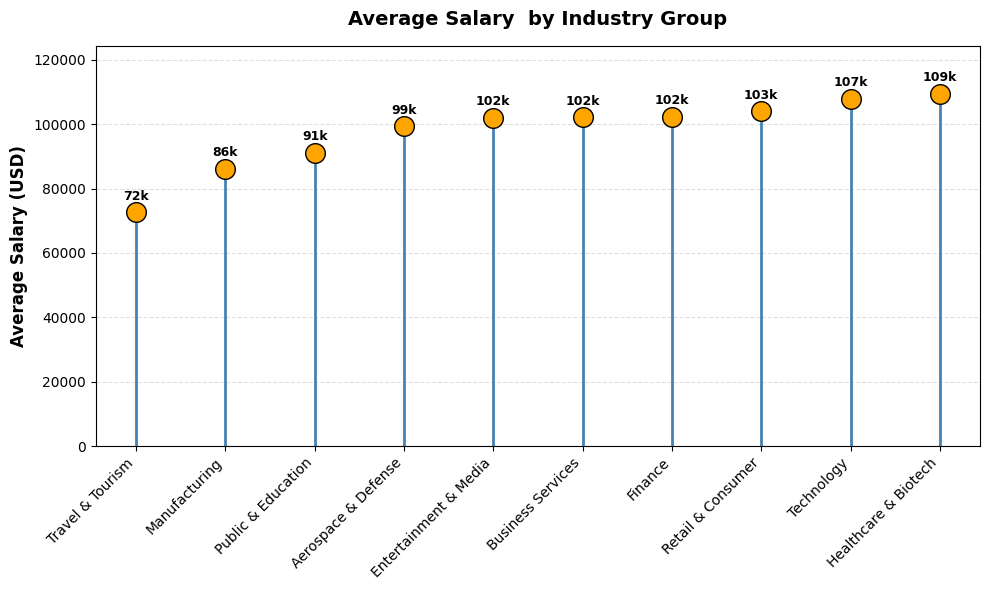

In [ ]:
# =========================================
# 1) สร้างตารางสรุป: Average Salary by Industry Group
# =========================================
df_sector = (
    df.groupby("Industry Group")["Salary Mid Point"]
    .mean()
    .reset_index()
    .rename(columns={"Salary Mid Point": "Avg Salary (USD)"})
)

print("✅ Summary Completed")
display(df_sector.head())

df_sector_no_other = df_sector[df_sector["Industry Group"] != "Other"]

# เรียงจากน้อย → มาก
sorted_df = df_sector_no_other.sort_values("Avg Salary (USD)", ascending=True).reset_index(drop=True)
x_positions = range(len(sorted_df))

# เริ่มวาดกราฟ
plt.figure(figsize=(10, 6))

# เส้นแนวตั้ง
plt.vlines(
    x=x_positions,
    ymin=0,
    ymax=sorted_df["Avg Salary (USD)"],
    color="steelblue", linewidth=2
)

# จุดสีส้ม
plt.scatter(
    x_positions,
    sorted_df["Avg Salary (USD)"],
    s=200,
    color="orange",
    edgecolors="black",
    zorder=3
)

# แสดงค่าเงินเดือนด้านบน (หน่วย: k)
for i, row in sorted_df.iterrows():
    plt.text(
        i, row["Avg Salary (USD)"] + 3000,
        f'{int(row["Avg Salary (USD)"]/1000)}k',
        ha="center", va="bottom",
        fontsize=9, weight="bold"
    )

# ตกแต่งกราฟ
plt.xticks(x_positions, sorted_df["Industry Group"], rotation=45, ha="right")
plt.ylabel("Average Salary (USD)", fontsize=12, weight="bold")
plt.title("Average Salary  by Industry Group",
          fontsize=14, weight="bold", pad=15)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.ylim(0, sorted_df["Avg Salary (USD)"].max() + 15000)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2432865452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


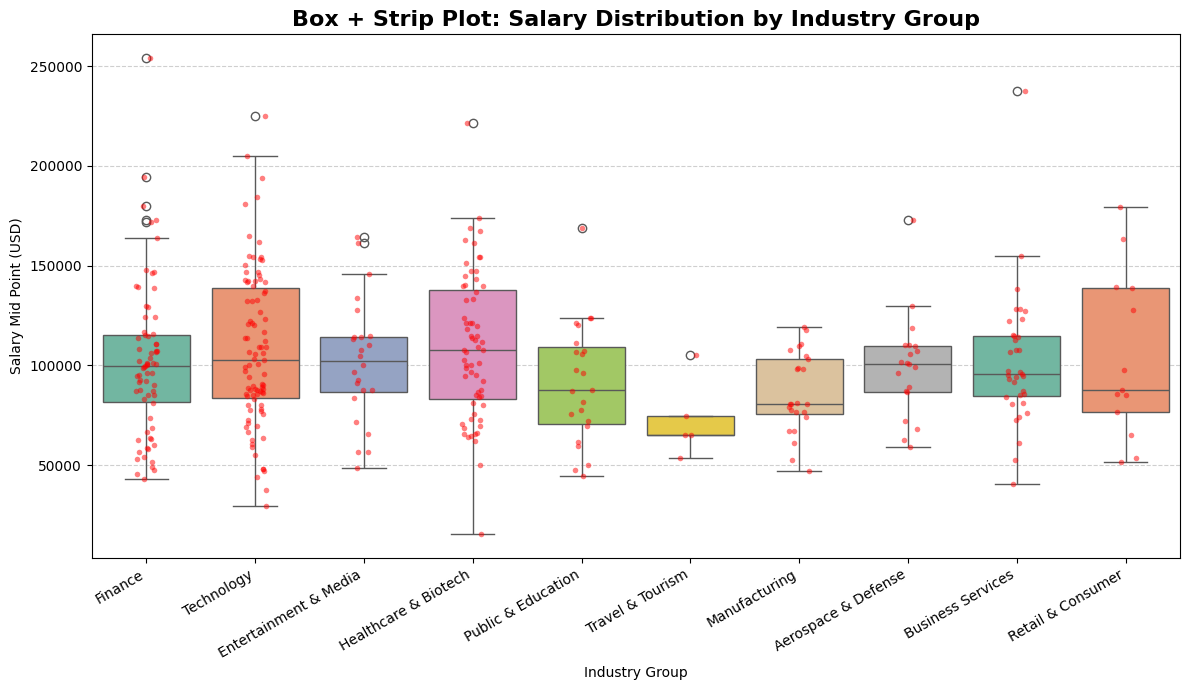

In [ ]:
# 6) Box Plot + Strip Plot (Overlay)
# -------------------------------
plt.figure(figsize=(12,7))
ax = sns.boxplot(
    data=df,
    x="Industry Group",
    y="Salary Mid Point",
    palette="Set2"
)
sns.stripplot(
    data=df,
    x="Industry Group",
    y="Salary Mid Point",
    color="red",
    alpha=0.5,
    size=4,
    jitter=True,
    ax=ax
)
plt.title("Box + Strip Plot: Salary Distribution by Industry Group", fontsize=16, weight="bold")
plt.xlabel("Industry Group")
plt.ylabel("Salary Mid Point (USD)")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#1. ความจริงที่ค่าเฉลี่ยอาจไม่บอก

ถ้ามองแค่ค่าเฉลี่ย เราอาจคิดว่าแต่ละอุตสาหกรรมต่างกันไม่มาก แต่กราฟกระจายเงินเดือน (Box + Strip) บอกเล่าเรื่องที่ลึกกว่านั้น

สาย  Finance / Technology / Healthcare → มีการกระจายกว้างมากประมาณ 50K ถึง 200K หรือมากกว่านั้น มีจุดของตำแหน่งงานค่อนข้างหนาแน่น แปลว่า industry เหล่านี้ นี้มีทั้ง entry-level และพรีเมียม roles ที่มีโอกาสเติบโต และทำเงินได้มาก

สาย Travel & Tourism  เพดานต่ำและแคบที่สุด อาจบอกได้ว่า รายได้และตำแหน่งจำกัดมาก

จุดที่สำคัญ คือ โอกาสในการ “โต” ด้านรายได้ ขึ้นอยู่กับว่าคุณอยู่ industry ไหน ไม่ใช่แค่เงินเดือนเฉลี่ยที่เห็น

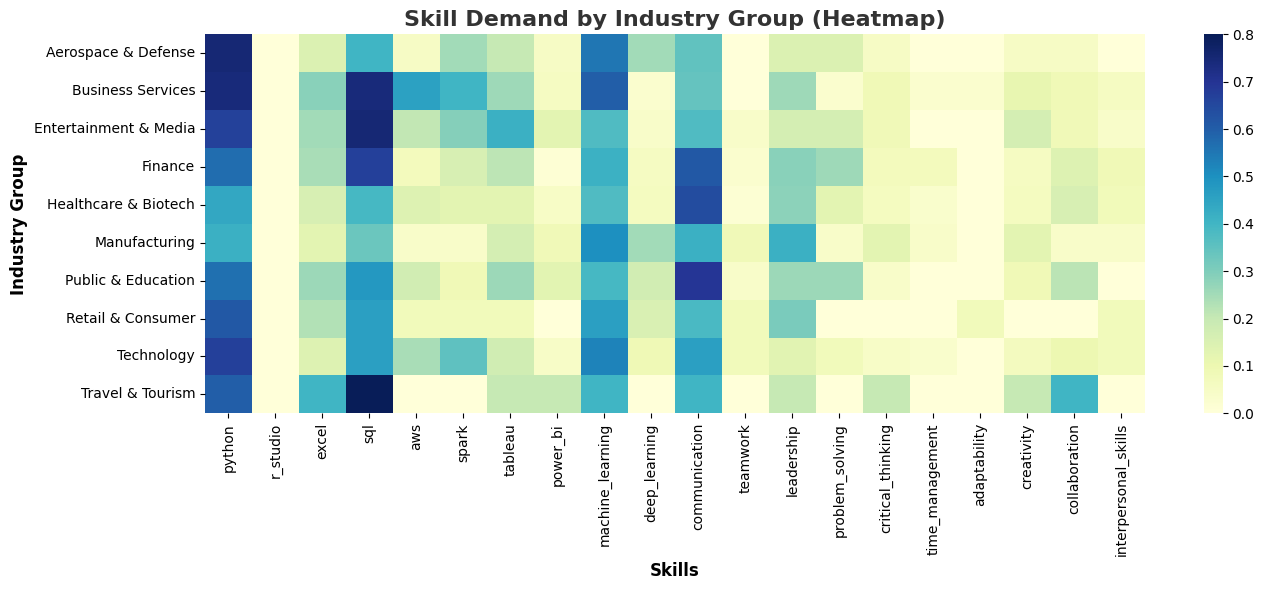

In [ ]:
# 8) Heatmap: Industry × Skills
# -------------------------------
plt.figure(figsize=(14,6))
heatmap_data = df.groupby("Industry Group")[skill_cols].mean().sort_index()

sns.heatmap(
    heatmap_data,
    annot=False,
    cmap="YlGnBu",
    cbar=True
)

plt.title("Skill Demand by Industry Group (Heatmap)", fontsize=16, weight="bold", color="#333333")
plt.xlabel("Skills", fontsize=12, weight="bold")
plt.ylabel("Industry Group", fontsize=12, weight="bold")
plt.tight_layout()
plt.show()


# core skill ที่ทุกคนต้องมี
“จาก heatmap เราจะเห็นว่า สีที่เข้มที่สุด ในหลาย ๆ แถว (อุตสาหกรรม) มักไปตกอยู่ที่ทักษะบางกลุ่ม เช่น Python, SQL, Communication และ machine learning skill
นี่เป็นสัญญาณชัดเจนว่า ทักษะเหล่านี้คือ core skill ของสาย Data — ไม่ว่าคุณจะอยู่ในอุตสาหกรรมไหนก็ตาม ต้องใช้แน่นอน

Python เป็นแกนหลัก ของ data science, data engineering และ ML → ทุก industry ใช้เป็นหลัก

SQL  ภาษาเชื่อมต่อกับข้อมูลแทบทุกระบบฐานข้อมูล  ยิ่งเข้มใน Finance, Business Services

Communication  ไม่ได้เป็นแค่ soft skill แต่เป็น business-critical skill ที่ทำให้ insight ถูกนำไปใช้จริง

ดังนั้น ถ้าเรามอง heatmap เป็น “แผนที่การลงทุนด้าน skill” จะตีความได้ว่า:

Core Skills (Python, SQL, Communication)  ที่ต้องแข็งแรง เพื่อผ่านเข้าสู่งานทุก industry

Specialized Skills (เช่น ML/Deep Learning, Excel, Collaboration) = จะช่วยต่อยอดเฉพาะ industry ที่เราอยากเข้าไป
